In [2]:
from css_code import shor_code_matrices
import matplotlib.pyplot as plt
import numpy as np
from ldpc import BpDecoder, BpOsdDecoder
from decoder_performance import compute_logical_error_rate

error_rates = np.linspace(0.01, 0.2, 20)  # Error rates from 0.01 to 0.1
max_iter = 60
ms_scaling_factor = 0.625
osd_order = 9  # Order of the OSD method
run_count = 1000 # Number of runs for each error rate
logical_error_rates_bp = []
logical_error_rates_bp_osd = []

logical_error_rates_bp_2 = []
logical_error_rates_bp_osd_2 = []

Hx, Hz, Lx, Lz = shor_code_matrices()
print("Lx, Lz matrices for Shor code:")
print("Lx:\n", Lx.toarray())
print("Lz:\n", Lz.toarray())

for error_rate in error_rates:
    bp_decoder = BpDecoder(
        pcm=Hx,
        error_rate=float(error_rate),
        max_iter=max_iter,
        ms_scaling_factor=ms_scaling_factor,
        schedule="parallel",
        bp_method="minimum_sum",
    )

    logical_error_rate_bp = compute_logical_error_rate(Hx, Lx, error_rate, run_count=run_count, DECODER=bp_decoder, run_label="BP")
    logical_error_rates_bp.append(logical_error_rate_bp)

    bp_osd_decoder = BpOsdDecoder(
        pcm=Hx,
        error_rate=float(error_rate),
        max_iter=max_iter,
        ms_scaling_factor=ms_scaling_factor,
        schedule="parallel",
        bp_method="minimum_sum",
        osd_method="OSD_CS",
        osd_order=osd_order,
    )


    logical_error_rate_bp_osd = compute_logical_error_rate(Hx, Lx, error_rate, run_count=run_count, DECODER=bp_osd_decoder, run_label="BP_OSD")
    logical_error_rates_bp_osd.append(logical_error_rate_bp_osd)

print("Logical error rates for BP decoder:", logical_error_rates_bp)
print("Logical error rates for BP+OSD decoder:", logical_error_rates_bp_osd)

Lx, Lz matrices for Shor code:
Lx:
 [[1 1 1 0 0 0 0 0 0]]
Lz:
 [[1 0 0 1 0 0 1 0 0]]
Decoder BP finished in 0.02 seconds with 67 failures out of 1000 runs.
Logical error rate for BP: 0.067
Decoder BP_OSD finished in 0.02 seconds with 2 failures out of 1000 runs.
Logical error rate for BP_OSD: 0.002
Decoder BP finished in 0.02 seconds with 102 failures out of 1000 runs.
Logical error rate for BP: 0.102
Decoder BP_OSD finished in 0.02 seconds with 12 failures out of 1000 runs.
Logical error rate for BP_OSD: 0.012
Decoder BP finished in 0.02 seconds with 159 failures out of 1000 runs.
Logical error rate for BP: 0.159
Decoder BP_OSD finished in 0.02 seconds with 23 failures out of 1000 runs.
Logical error rate for BP_OSD: 0.023
Decoder BP finished in 0.02 seconds with 210 failures out of 1000 runs.
Logical error rate for BP: 0.21
Decoder BP_OSD finished in 0.03 seconds with 36 failures out of 1000 runs.
Logical error rate for BP_OSD: 0.036
Decoder BP finished in 0.02 seconds with 244 failu

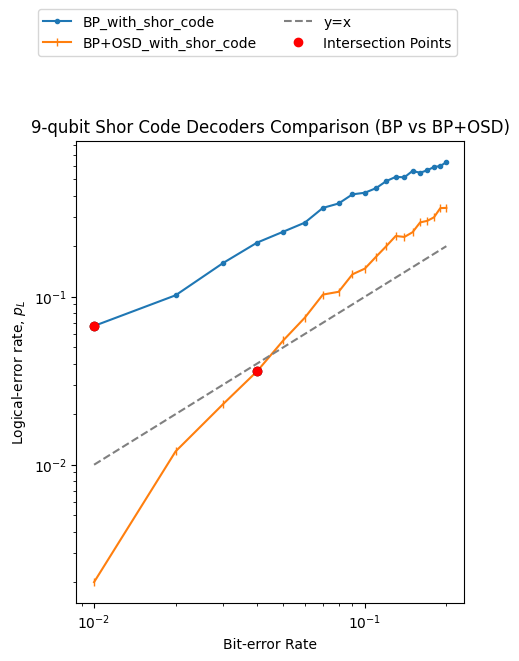

In [8]:
def find_intersection(x_vals, y_vals):
    diff = np.abs(x_vals - y_vals)
    idx = np.argmin(diff)
    return x_vals[idx], y_vals[idx]

# Find intersection for each curve
ix1, iy1 = find_intersection(error_rates, logical_error_rates_bp)
ix2, iy2 = find_intersection(error_rates, logical_error_rates_bp_osd)

plt.figure(figsize=(5, 6))
plt.title("9-qubit Shor Code Decoders Comparison (BP vs BP+OSD)")
plt.xlabel("Bit-error Rate")
plt.ylabel(r"Logical-error rate, $p_L$")
plt.xscale('log')
plt.yscale('log')

plt.plot(error_rates, logical_error_rates_bp, label="BP_with_shor_code", marker='.')
plt.plot(error_rates, logical_error_rates_bp_osd, label="BP+OSD_with_shor_code", marker='|')

# plot y = x
plt.plot(error_rates, error_rates, label="y=x", linestyle='--', color='gray')

plt.plot(ix1, iy1, 'ko')
plt.plot(ix2, iy2, 'ko')
# plt.plot(ix3, iy3, 'ko')
# plt.plot(ix4, iy4, 'ko')

plt.plot([ix1, ix2], [iy1, iy2], 'ro', label='Intersection Points')

plt.legend(bbox_to_anchor=(1, 1.3), ncol=2)
# plt.show()